In [1]:
#importations des modules et chargement du fichier de tweets
import json
import re
import matplotlib.pyplot as plt
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob import TextBlob

f = open("versailles_tweets_100.json","r")
data = json.load(f)
print(data[9])

{'_id': '1421562928176803848', 'attachments': {'media_keys': ['3_1421562925999869960']}, 'public_metrics': {'retweet_count': 1, 'reply_count': 0, 'like_count': 2, 'quote_count': 0}, 'id': '1421562928176803848', 'conversation_id': '1421553997811421184', 'entities': {'mentions': [{'start': 0, 'end': 13, 'username': 'leonna_julie', 'id': '3200704501'}], 'urls': [{'start': 279, 'end': 302, 'url': 'https://t.co/F6zvVfWwAf', 'expanded_url': 'https://twitter.com/jol45026290/status/1421562928176803848/photo/1', 'display_url': 'pic.twitter.com/F6zvVfWwAf'}]}, 'author_id': '992904738516717570', 'text': "@leonna_julie Le rdv aujourd'hui aura  tenu ses promesses!👍🤗✌️✊🏼✊🏼\n Pour les problèmes de sommeil  1 cachet à la mélatonine 1,80 mg et je dors comme un bébé!  Réveil en pleine forme assuré!💪🏼 Et sans acoutumances, pas comme avec ces béquilles chimiques!😵\u200d💫\nBonne soirée Julie!🌆🌈 https://t.co/F6zvVfWwAf", 'geo': {'place_id': '011a304d683c2461'}, 'lang': 'fr', 'created_at': '2021-07-31T20:06:

In [2]:
def deEmojify(data):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',data)

def remove_emoji(val):
        emoji_pattern = re.compile(
            u'(\U0001F1F2\U0001F1F4)|'  # Macau flag
            u'([\U0001F1E6-\U0001F1FF]{2})|'  # flags
            u'([\U0001F600-\U0001F64F])'  # emoticons
            "+", flags=re.UNICODE)
        val = emoji_pattern.sub('', val) 
        return val
    
def supprime_emojis(val):
    message = ""
    for i in val:
        if re.compile("[\w|\.|,|\?|!|:|;|\s|(|)|\-|@|#|/|'|_|’]").search(i):
            message += i
    return message
   
    
txt = "salut?😁"




In [3]:
# définition de la classe Tweet
class Tweet:
    def __init__(self, ecrivain, message, hashtags = "pas de hashtags", mention= "pas de mentions"):
        self.ecrivain = ecrivain
        self.mention = mention
        self.message = message
        self.hashtags = hashtags
        
    def find_hashtags(self):
        regex = re.compile("(#[A-Za-z][A-Za-z0-9-_]+)")
        self.hashtags = regex.findall(self.message)
        return self.hashtags
    
    def find_mention(self):
        regex = re.compile("(@[A-Za-z][A-Za-z0-9-_]+)")
        self.mention = regex.findall(self.message)
        return self.mention
    
    
    def affichage_auteur(self):
        return self.ecrivain
        
    def affichage_hashtag(self):
        return Tweet.find_hashtags(self)
    
    def affichage_mention(self):
        return Tweet.find_mention(self)
    
    def affichage_message(self):
        return self.message
    
    def sentiment_message(self):
        p = TextBlob(self.message,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]
        if p < 0 :
            return("négatif")
        elif p < 0 :
            return("positif")
        else:
            return("neutre")
    
    def info(self):
        return self.ecrivain, self.message, Tweet.find_hashtags(self), Tweet.find_mention(self)

l_tweets = []     

for i in range(len(data)):
    for item, val in data[i].items():
        if item == "author_id":
            auteur = val
        if item == "text":
            message = supprime_emojis(val)
            
        if item == "entiies":
            mention = val
        else:
            mention = "pas de mention"
    l_tweets.append(Tweet(auteur,message))

In [4]:
#fichier atterissage (tweets filtrés)
filtrer = open("filtre.txt","w")
for i in range(len(l_tweets)):
    filtrer.write(str(l_tweets[i].info())+ "\n" + "\n")
filtrer.close()

In [5]:
# choix de l'utilisateur
def Parcourir_tweet():
    print("il y a",len(l_tweets),"tweets en tout")
    c = 0
            
    while 1:
        c = int(input("quel tweet?"))
        print(l_tweets[c].affichage_message())
        while 1:
            n = int(input(" saississez un nombre: 0 = auteur de la publication, 1 = hashtags dans la publication, 2 = mentions dans la publication, 3 : sentiment du tweet"))
            if n == 0:
                print(l_tweets[c].affichage_auteur())
            if n == 1:
                print(l_tweets[c].affichage_hashtag())
            if n == 2:
                print(l_tweets[c].affichage_mention())
            if n == 3:
                print(l_tweets[c].sentiment_message())
            arret = input("voulez vous continuer? oui ou non")
            if arret == "oui":
                pass
            elif arret == "non": 
                break
            else:
                pass
        other_tweet = input("analyser un autre tweet ?")
        if other_tweet == "oui":
            pass
        else:
            break

[[2, '#CIV'], [1, '#versailles'], [1, '#twitter225'], [1, '#nocturne']]


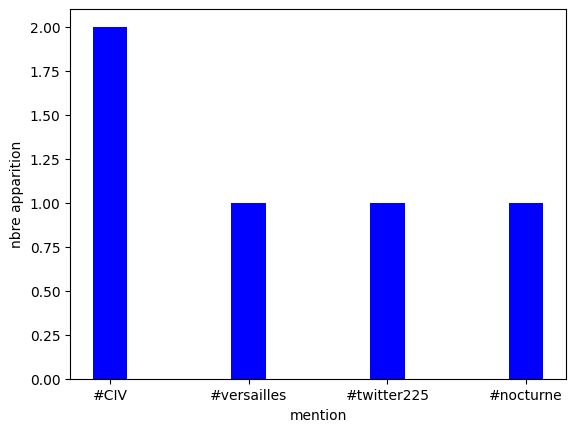

[[2, '#CIV'], [1, '#versailles'], [1, '#twitter225'], [1, '#nocturne'], [1, '#jifa'], [1, '#domie'], [1, '#appollon'], [1, '#SupportriceMazo']]


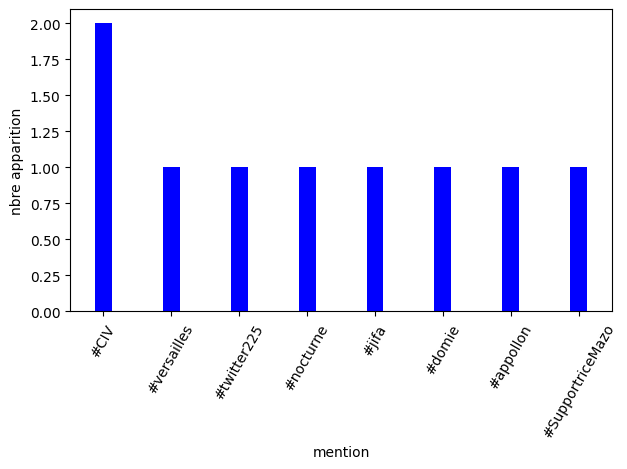

In [6]:
#top hashtags
l_hashtags = list()
for i in range(len(l_tweets)):
    l_hashtags.append(l_tweets[i].find_hashtags())

l_hashtags1 = list()
for i in range(len(l_hashtags)):
    for j in range(len(l_hashtags[i])):
        l_hashtags1.append(l_hashtags[i][j])
l_hashtags_count = list()
l_hashtags_final = list()
a = 0
for i in l_hashtags1:
    if i in l_hashtags_final:
        pass
    else:
        l_hashtags_final.append(l_hashtags1[a])
    a += 1
for i in range(len(l_hashtags_final)):
    l_hashtags_count.append(l_hashtags1.count(l_hashtags_final[i]))


l_top_hastags = list()
for i in range(len(l_hashtags_final)):
    l_top_hastags.append([l_hashtags_count[i],l_hashtags_final[i]])

def top_hastag(k):
    l = sorted(l_top_hastags, reverse =True)
    l_f = []
    x = []
    y = []
    for i in range(k):
       l_f.append(l[i])
    print(l_f)
    for i in l_f:
        for j in i:
            if type(j) is type(int()):
                y.append(j)
            else:
                x.append(j)
    
    plt.bar(x,y,width = 0.25 , color = "blue")
    plt.xlabel("mention")
    plt.ylabel("nbre apparition")
    plt.show()

def nombre_publication_hashtags():
    l = sorted(l_top_hastags, reverse =True)
    l_f = []
    x = []
    y = []
    for i in range(len(l_top_hastags)):
       l_f.append(l[i])
    print(l_f)
    for i in l_f:
        for j in i:
            if type(j) is type(int()):
                y.append(j)
            else:
                x.append(j)
    
    plt.bar(x,y,width = 0.25 , color = "blue")
    plt.xlabel("mention")
    plt.ylabel("nbre apparition")
    plt.tick_params(axis='x', rotation=60)
    plt.tight_layout()
    plt.show()
    
top_hastag(4)
nombre_publication_hashtags()
    

[[3, '@leonna_julie'], [2, '@anniemacmanus'], [1, '@yebbasmith']]
['@leonna_julie', '@anniemacmanus', '@yebbasmith']
[3, 2, 1]


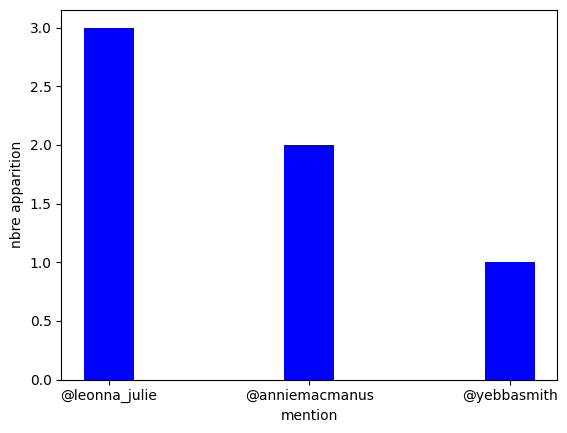

In [7]:

l_mention = list()
for i in range(len(l_tweets)):
    l_mention.append(l_tweets[i].find_mention())

l_mention1 = list()
for i in range(len(l_mention)):
    for j in range(len(l_mention[i])):
        l_mention1.append(l_mention[i][j])

l_mention2 = list()
a = 0
for i in l_mention1:
    
    if (i in l_mention2) == False:
        l_mention2.append(l_mention1[a])
    a += 1
l_mention_final = list()  
for i in range(len(l_mention2)):
    l_mention_final.append([l_mention1.count(l_mention2[i]),l_mention2[i]])

#tri
def top_mention(k):
    l = sorted(l_mention_final, reverse =True)
    l_f = []
    x = []
    y = []
    for i in range(k):
       l_f.append(l[i])
    print(l_f)
    for i in l_f:
        for j in i:
            if type(j) is type(int()):
                y.append(j)
            else:
                x.append(j)
    print(x)
    print(y)
    plt.bar(x,y,width = 0.25 , color = "blue")
    plt.xlabel("mention")
    plt.ylabel("nbre apparition")
    plt.show()
        

top_mention(3)

In [8]:
# • Top K hashtags (k est un paramètre passé par l’utilisateur) OUI
# • Top K utilisateurs OUI
# • Top K utilisateurs mentionnés OUI
# • Le nombre de publications par utilisateur OUI
# • Le nombre de publications par hashtag OUI


# • L’ensemble de tweets d’un utilisateur spécifique OUI
# • L’ensemble de tweets mentionnant un utilisateur spécifique  OUI

# • Les utilisateurs mentionnant un hashtag spécifique  OUI

# • Les utilisateurs mentionnés par un utilisateur spécifique NON
# . interface EN COURS


# • Top K topics NON 
# # • Le nombre de publications par topic NON

['1339914264522461187', '1339914264522461187', '1339914264522461187', '1339914264522461187', '717025418', '992904738516717570', '992904738516717570', '736523371', '1471684208', '992904738516717570', '3169236915', '992904738516717570', '16267684', '60117154', '3169236915', '372993152', '372993152', '105241852', '2357913366', '717025418']
['1339914264522461187', '717025418', '992904738516717570', '736523371', '1471684208', '3169236915', '16267684', '60117154', '372993152', '105241852', '2357913366']
[[4, '1339914264522461187'], [2, '717025418'], [4, '992904738516717570'], [1, '736523371'], [1, '1471684208'], [2, '3169236915'], [1, '16267684'], [1, '60117154'], [2, '372993152'], [1, '105241852'], [1, '2357913366']]
[[4, '992904738516717570'], [4, '1339914264522461187'], [2, '717025418'], [2, '372993152']]
['992904738516717570', '1339914264522461187', '717025418', '372993152']
[4, 4, 2, 2]


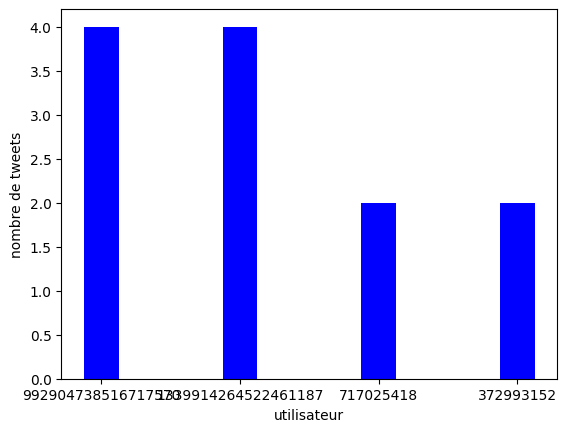

[[4, '992904738516717570'], [4, '1339914264522461187'], [2, '717025418'], [2, '372993152'], [2, '3169236915'], [1, '736523371'], [1, '60117154'], [1, '2357913366'], [1, '16267684'], [1, '1471684208'], [1, '105241852']]
['992904738516717570', '1339914264522461187', '717025418', '372993152', '3169236915', '736523371', '60117154', '2357913366', '16267684', '1471684208', '105241852']
[4, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1]


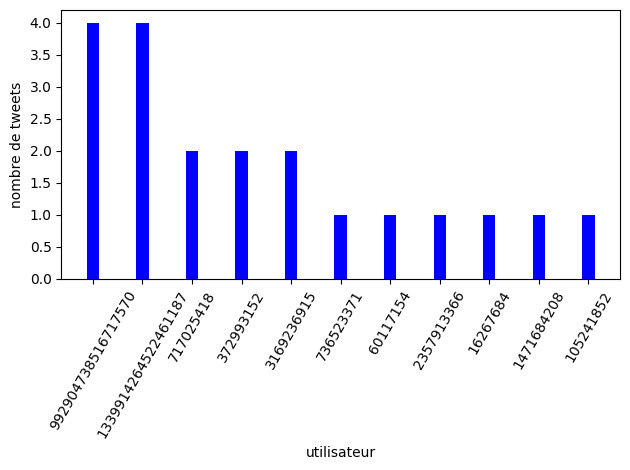

In [9]:
l_users = list()
l_users_all = list()
for i in range(len(l_tweets)):
    l_users_all.append(l_tweets[i].affichage_auteur())
    if l_tweets[i].affichage_auteur() in l_users:
        pass
    else:
        l_users.append(l_tweets[i].affichage_auteur())

print(l_users_all)
print(l_users)
nb_tweet_by_user = list()
for i in range(len(l_users)):
    nb_tweet_by_user.append([l_users_all.count(l_users[i]),l_users[i]])

print(nb_tweet_by_user)


def top_users(k):
    l = sorted(nb_tweet_by_user, reverse =True)
    l_f = []
    x = []
    y = []
    for i in range(k):
       l_f.append(l[i])
    print(l_f)
    for i in l_f:
        for j in i:
            if type(j) is type(int()):
                y.append(j)
            else:
                x.append(j)
    
    print(x)
    print(y)
    plt.bar(x,y,width = 0.25 , color = "blue")
    plt.xlabel("utilisateur")
    plt.ylabel("nombre de tweets")
    plt.show()
    
    
def nombre_publication_users():
    l = sorted(nb_tweet_by_user, reverse =True)
    l_f = []
    x = []
    y = []
    for i in range(len(nb_tweet_by_user)):
       l_f.append(l[i])
    print(l_f)
    for i in l_f:
        for j in i:
            if type(j) is type(int()):
                y.append(j)
            else:
                x.append(j)
    
    print(x)
    print(y)
    plt.bar(x,y,width = 0.25 , color = "blue")
    plt.xlabel("utilisateur")
    plt.ylabel("nombre de tweets")
    plt.tick_params(axis='x', rotation=60)
    plt.tight_layout()
    plt.show()

top_users(4)
nombre_publication_users()
    

In [10]:
class User():
    def __init__(self, auteur, nbre, message = [] ,mentions = 0):
        self.nom = auteur
        self.nb_tweets = nbre
        self.message = message
        self.mentions = mentions
    
    def affichage_auteur(self):
        return self.nom
    
    def nb_tweets_user(self):
        return self.nb_tweets
    
    def affichage_message(self):
        return self.message
    
    def ajouter_message(self,k):
        self.message.append(k)
    
    def mentions_(self):
        return self.mentions
    

l = sorted(nb_tweet_by_user, reverse =True)
l_f = []
cpt = []
users = []
for i in range(len(l)):
    l_f.append(l[i])

for i in l_f:
    for j in i:
        if type(j) is type(int()):
            cpt.append(j)
        else:
            users.append(j)
l_users_class = list()

for i in range(len(l)):
    l_users_class.append(User(users[i],cpt[i]))
    
l_message_autor = list()
l_all_messages = list()
d = dict()
for i in range(len(data)):
    for item, val in data[i].items():
        if item == "author_id":
            auteur = val
        if item == "text":
            message = deEmojify(val)
    d[auteur] = list()
    l_message_autor.append([auteur,message])
    l_all_messages.append([message])
      


 
for i in range(len(l_message_autor)):
    d[l_message_autor[i][0]].append([l_message_autor[i][1]])
         
#print(d)

def mention_in_tweets(k):
    for i in range(len(l_all_messages)):
        for j in range(len(l_all_messages[i])):
            if re.search(str(k),l_all_messages[i][j]):
                print(l_all_messages[i])
        
#mention_in_tweets("@leonna_julie")
    


In [44]:
def users_mentionnant_hashtag():
    l_users_mentionnant = list()
    regex = re.compile("(#[A-Za-z][A-Za-z0-9-_]+)")
    for key,val in d.items():
         for i in range(len(val)):
             for j in range(len(val[i])):
                if re.search(regex,val[i][j]):
                    l_users_mentionnant.append(key)
    print("Les utilisateurs mentionnant un hashtag spécifique" ,set(l_users_mentionnant))
    
users_mentionnant_hashtag()

Les utilisateurs mentionnant un hashtag spécifique {'1339914264522461187', '1471684208'}


In [12]:
def tweet_auteur(k):
    for key, val in d.items():
        if key == k:
            print(val)
            
tweet_auteur("c")

In [52]:
def users_mentionne_by_user():
    l_users_mentionne_by_user = list()
    regex = re.compile("(@[A-Za-z][A-Za-z0-9-_]+)")
    for key,val in d.items():
        for i in range(len(val)):
            for j in range(len(val[i])):
                c = regex.findall(val[i][j])
                if len(c) != 0:
                    l_users_mentionne_by_user.append(regex.findall(val[i][j]))
    return l_users_mentionne_by_user

users_mentionne_by_user()

[['@ericbailly24', '@maxigr04del'],
 ['@isabelle170516', '@leonna_julie', '@Steiner2502'],
 ['@LynLyna12', '@leonna_julie'],
 ['@leonna_julie'],
 ['@Polo82810715', '@lrestistant73'],
 ['@miliemelo82', '@kilianbridoux', '@LeMeneec'],
 ['@Pauluskupa'],
 ['@anniemacmanus'],
 ['@yebbasmith', '@anniemacmanus'],
 ['@AzmiAnees3']]

In [14]:
def Parcourir_users():
    print("il y a",len(l_users_class),"users en tout")
    c = 0
            
    while 1:
        c = int(input("quel users?"))
        print(l_users_class[c].affichage_auteur())
        while 1:
            n = int(input(" saississez un nombre: 0 = nom user, 1 = nbre de tweets, 2 = users mentionnés"))
            if n == 0:
                print(l_users_class[c].affichage_auteur())
            if n == 1:
                print(l_users_class[c].nb_tweets_user())
            if n == 2:
                print(users_mentionne_by_user(l_users_class[c].affichage_auteur()))
                
            arret = input("voulez vous continuer à analyse l'utilisateur? oui ou non")
            if arret == "oui":
                pass
            elif arret == "non": 
                break
            else:
                pass
        other_tweet = input("analyser un autre user ?")
        if other_tweet == "oui":
            pass
        else:
            break

In [15]:
def Start():
    
    a = input("Voulez vous parcourir les tweets")
    if a == "oui":
        aff_tweets = input("voulez vous afficher tout les tweets")
        if aff_tweets == "oui":
            for i in range(len(l_all_messages)):
                print(l_all_messages[i])
        Parcourir_tweet()
    else:
        pass
    
    b = input("Voulez vous voir un top k ou  l'ensemble?")
    if b == "oui":
        while 1:
            f = input("0 : top,  1 : ensemble")
            if f == 0:
                c = int(input(" entrer 0, 1 ou 2 (0 : top hashtags, 1 : top mentions, 2 : top users) "))
                if c == 0:
                    k = int(input("top combien?"))
                    top_hastag(k)
                elif c == 1:
                    k = int(input("top combien?"))
                    top_mention(k)
                elif c==2:
                    k = int(input("top combien?"))
                    top_users(k)
                else:
                    pass
              
            if f == 1:
                c = int(input("0 : ensemble des hashtags, 1 : ensemble des mentions, 2 : ensemble des users) "))
                if c == 0:
                    nombre_publication_hashtags()
                elif c == 1:
                    pass#faire
                elif c==2:
                    nombre_publication_users()
                else:
                    pass
            other_top = input("other top ?")
            if other_top == "oui":
                pass
            else:
                break
    
    d = input("voulez vous parcourir les users? ")
    if d == "oui":
        Parcourir_users()
    else:
        pass


lancer_app = input("Voulez vous lancer  InPoDa (analyse de tweets)")
if lancer_app == "oui":
    Start()